# Dimentionalty Reduction

In [ ]:
import pandas as pd
import numpy as np
from numpy.linalg import eig, svd
from sklearn import datasets
import matplotlib.pyplot as plt 


In [5]:
class PCADimensionalityReducer(DimensionalityReducer):
    
    def __init__(self,data):
        
        self.eigen_values = None 
        self.eigen_vectors = None
        
        super(PCADimensionalityReducer,self).__init__(data=data)
        
    def reduce(self):
        self.eigen_values, self.eigen_vectors = eig(self.data.cov())
        self.eigen_vectors = np.real(self.eigen_vectors)
            
    def reconstruct_data(self, target_dimension):
            
        return pd.DataFrame(np.dot(
            np.dot(self.data - self.data.mean(axis=0),
                   self.eigen_vectors[:,:target_dimension]),
            np.transpose(self.eigen_vectors[:,:target_dimension])) + self.data.mean().values)
            

In [6]:
class SVDDimensionalityReducer(DimensionalityReducer):
    
    def __init__(self,data):
        
        self.s = None 
        self.v = None
        self.u = None
        
        super(SVDDimensionalityReducer,self).__init__(data=data)
    
    def reduce(self):
        self.u, self.s, self.v = svd(self.data)
            
    def reconstruct_data(self, target_dimension):

        s = np.diag(self.s[:target_dimension])
        u = self.u[:,:target_dimension]
        v = self.v[:target_dimension]

        return pd.DataFrame(np.dot(u, np.dot(s, v)))
        

In [7]:
dataset = datasets.fetch_olivetti_faces(shuffle=True)
faces = dataset.data

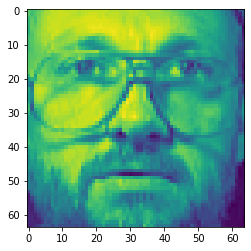

In [8]:
plt.imshow(faces[0].reshape((64,64))) 
plt.show()

In [20]:
%time
target_dim = 100

dr_pca = PCADimensionalityReducer(data=pd.DataFrame(faces))

reconstructed_image_pca = dr_pca.reconstruct_data(target_dim).iloc[0].values.reshape((64,64))

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 11.4 µs


CPU times: user 28 µs, sys: 14 µs, total: 42 µs
Wall time: 16.7 µs


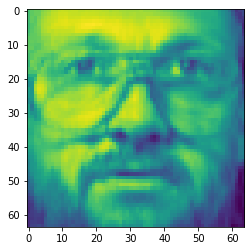

In [19]:
%time
plt.imshow(reconstructed_image_pca) 
plt.show()

In [21]:
dr_svd = SVDDimensionalityReducer(data=pd.DataFrame(faces))

reconstructed_image_svd = dr_svd.reconstruct_data(target_dim).iloc[0].values.reshape((64,64))

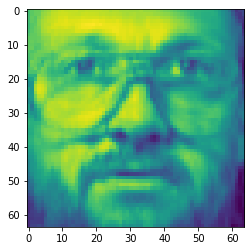

In [16]:
plt.imshow(reconstructed_image_svd) 
plt.show()